# Artificial intelligence

# Optional Project-Code

## Name- Hrishikesh Dinkar Kanade


### Implementation:

## 1. Data preparation

### 1.1. Load data


In [1]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.layers import BatchNormalization, Activation
tf.config.run_functions_eagerly(True)
%matplotlib inline
### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

170508288/170498071 [==============================] - 13s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    one_hot=np.zeros((len(y),num_class))
    for iter,category in enumerate(y):
      one_hot[iter,category]= 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 1.3. Randomly partition the training set to training and validation sets 

Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [3]:
random_indices= np.random.permutation(50000)
train_indices=random_indices[0:40000]
valid_indices= random_indices[40000:50000]

x_val=x_train[valid_indices,:,:,:]
y_val=y_train_vec[valid_indices,:]
x_tr=x_train[train_indices,:,:,:]
y_tr=y_train_vec[train_indices,:]

x_tr=tf.cast(x_tr,tf.float32)
y_tr=tf.cast(y_tr,tf.float32)
y_val=tf.cast(y_val,tf.float32)
x_val=tf.cast(x_val,tf.float32)
x_train=tf.cast(x_train,tf.float32)
y_train_vec=tf.cast(y_train_vec,tf.float32)
x_test=tf.cast(x_test,tf.float32)
y_test_vec=tf.cast(y_test_vec,tf.float32)
print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a baseline CNN without Batch normalization






In [4]:
# Build the model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [5]:
# Define model optimizer and loss function
model.compile(optimizers.RMSprop(learning_rate=0.001, momentum=0.5),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
# Train the model and store model parameters/loss values
history=model.fit(x_tr,y_tr,batch_size=256,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


157/157 [==============================] - 5s 22ms/step - loss: 6.9454 - accuracy: 0.1680 - val_loss: 2.2037 - val_accuracy: 0.2370
Epoch 2/20
157/157 [==============================] - 3s 21ms/step - loss: 1.8302 - accuracy: 0.3498 - val_loss: 1.5840 - val_accuracy: 0.4295
Epoch 3/20
157/157 [==============================] - 3s 21ms/step - loss: 1.5102 - accuracy: 0.4679 - val_loss: 1.4182 - val_accuracy: 0.5123
Epoch 4/20
157/157 [==============================] - 3s 20ms/step - loss: 1.2327 - accuracy: 0.5756 - val_loss: 1.2485 - val_accuracy: 0.5786
Epoch 5/20
157/157 [==============================] - 3s 20ms/step - loss: 1.0406 - accuracy: 0.6428 - val_loss: 1.5125 - val_accuracy: 0.5377
Epoch 6/20
157/157 [==============================] - 3s 20ms/step - loss: 0.8601 - accuracy: 0.7057 - val_loss: 1.2964 - val_accuracy: 0.5812
Epoch 7/20
157/157 [==============================] - 3s 20ms/step - loss: 0.7172 - accuracy: 0.7558 - val_loss: 1.3437 - val_accuracy: 0.5930
Epoch 8/20

## 3. Plot of training and validation loss curve versus epochs.

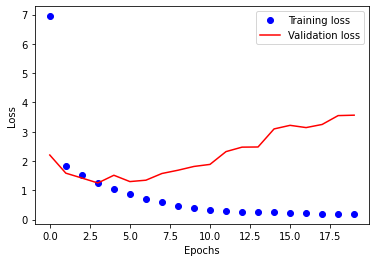

In [8]:
# Plot the loss curve
epochs=range(20)
train_loss= history.history['loss']
valid_loss=history.history['val_loss']
plt.plot(epochs, train_loss,'bo', label='Training loss')
plt.plot(epochs, valid_loss,'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [9]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc=model.evaluate(x_test,y_test_vec)
print("Test loss="+str(loss_and_acc[0]))
print("Test accuracy="+str(loss_and_acc[1]))

  1/313 [..............................] - ETA: 18s - loss: 2.7957 - accuracy: 0.6562

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 3s 10ms/step - loss: 3.6225 - accuracy: 0.6023
Test loss=3.622507333755493
Test accuracy=0.6022999882698059


## 5. Building model with batch normalization



## Model 1 with batch normalization added

In [10]:
# Build the model
model1=models.Sequential()
model1.add(layers.Conv2D(32,(3,3),input_shape=x_tr.shape[1:]))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(4,4)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(layers.Dense(10))
model1.add(BatchNormalization())
model1.add(Activation('softmax'))

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 64)      

In [12]:
# Define model optimizer and loss function
model1.compile(optimizers.RMSprop(learning_rate=0.001, momentum=0.5),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Train the model and store model parameters/loss values
history=model1.fit(x_tr,y_tr,batch_size=256,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


157/157 [==============================] - 6s 35ms/step - loss: 1.2666 - accuracy: 0.5878 - val_loss: 1.5508 - val_accuracy: 0.5044
Epoch 2/20
157/157 [==============================] - 5s 34ms/step - loss: 0.9122 - accuracy: 0.7136 - val_loss: 1.2820 - val_accuracy: 0.5617
Epoch 3/20
157/157 [==============================] - 5s 34ms/step - loss: 0.7220 - accuracy: 0.7783 - val_loss: 1.8982 - val_accuracy: 0.3909
Epoch 4/20
157/157 [==============================] - 5s 34ms/step - loss: 0.5642 - accuracy: 0.8333 - val_loss: 1.1668 - val_accuracy: 0.6221
Epoch 5/20
157/157 [==============================] - 6s 36ms/step - loss: 0.4307 - accuracy: 0.8790 - val_loss: 1.2251 - val_accuracy: 0.6069
Epoch 6/20
157/157 [==============================] - 5s 35ms/step - loss: 0.3189 - accuracy: 0.9198 - val_loss: 1.4824 - val_accuracy: 0.5671
Epoch 7/20
157/157 [==============================] - 6s 35ms/step - loss: 0.2323 - accuracy: 0.9463 - val_loss: 1.4126 - val_accuracy: 0.5881
Epoch 8/20

### Plotting Training and validation loss curve for structure 1

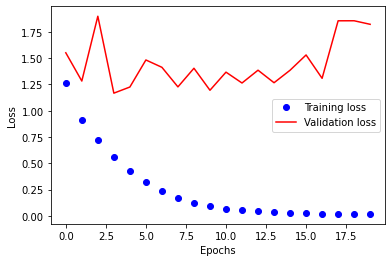

In [14]:
epochs=range(20)
train_loss= history.history['loss']
valid_loss=history.history['val_loss']
plt.plot(epochs, train_loss,'bo', label='Training loss')
plt.plot(epochs, valid_loss,'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## New model with higher learning rate.

## In the paper it is claimed that Batch normalization allows for higher learning rate so learning rate of 0.1 is being used here

In [15]:
# Build the model
model4=models.Sequential()
model4.add(layers.Conv2D(32,(3,3),input_shape=x_tr.shape[1:]))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Conv2D(64,(4,4)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(256))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(layers.Dense(10))
model4.add(BatchNormalization())
model4.add(Activation('softmax'))

In [18]:
# Define model optimizer and loss function
model4.compile(optimizers.RMSprop(learning_rate=0.1, momentum=0.5),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# Train the model and store model parameters/loss values
history=model4.fit(x_tr,y_tr,batch_size=256,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
  3/157 [..............................] - ETA: 5s - loss: 2.3126 - accuracy: 0.2917

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


157/157 [==============================] - 5s 34ms/step - loss: 1.4627 - accuracy: 0.4762 - val_loss: 3.0485 - val_accuracy: 0.4274
Epoch 2/20
157/157 [==============================] - 5s 34ms/step - loss: 1.0385 - accuracy: 0.6325 - val_loss: 2.1972 - val_accuracy: 0.4527
Epoch 3/20
157/157 [==============================] - 5s 34ms/step - loss: 0.8719 - accuracy: 0.6902 - val_loss: 1.9081 - val_accuracy: 0.5272
Epoch 4/20
157/157 [==============================] - 5s 33ms/step - loss: 0.7583 - accuracy: 0.7320 - val_loss: 1.9418 - val_accuracy: 0.5023
Epoch 5/20
157/157 [==============================] - 5s 33ms/step - loss: 0.6565 - accuracy: 0.7690 - val_loss: 4.7327 - val_accuracy: 0.3116
Epoch 6/20
157/157 [==============================] - 5s 34ms/step - loss: 0.5722 - accuracy: 0.7984 - val_loss: 1.8472 - val_accuracy: 0.5713
Epoch 7/20
157/157 [==============================] - 5s 34ms/step - loss: 0.4923 - accuracy: 0.8256 - val_loss: 1.9889 - val_accuracy: 0.5810
Epoch 8/20

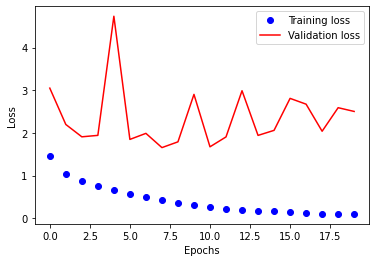

In [20]:
epochs=range(20)
train_loss= history.history['loss']
valid_loss=history.history['val_loss']
plt.plot(epochs, train_loss,'bo', label='Training loss')
plt.plot(epochs, valid_loss,'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Structure with batch normalization and Dropout

In [ ]:
# Build the model
model2=models.Sequential()
model2.add(layers.Conv2D(32,(3,3),input_shape=x_tr.shape[1:]))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(4,4)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(256))
model2.add(Activation('relu'))
model2.add(layers.Dense(10))
model2.add(Activation('softmax'))

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        32832     
                                                                 
 batch_normalization_17 (Bat  (None, 12, 12, 64)      

In [ ]:
model2.compile(optimizers.RMSprop(learning_rate=0.001, momentum=0.5),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model2.fit(x_tr,y_tr,batch_size=32,epochs=40,validation_data=(x_val,y_val))

Epoch 1/40
   1/1250 [..............................] - ETA: 1:42 - loss: 0.3759 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1250/1250 [==============================] - 112s 90ms/step - loss: 0.6786 - accuracy: 0.7671 - val_loss: 1.2168 - val_accuracy: 0.6196
Epoch 2/40
1250/1250 [==============================] - 113s 91ms/step - loss: 0.6705 - accuracy: 0.7717 - val_loss: 1.0037 - val_accuracy: 0.6634
Epoch 3/40
1250/1250 [==============================] - 110s 88ms/step - loss: 0.6549 - accuracy: 0.7789 - val_loss: 0.9836 - val_accuracy: 0.6681
Epoch 4/40
1250/1250 [==============================] - 113s 90ms/step - loss: 0.6286 - accuracy: 0.7884 - val_loss: 1.1768 - val_accuracy: 0.6488
Epoch 5/40
1250/1250 [==============================] - 115s 92ms/step - loss: 0.6061 - accuracy: 0.7964 - val_loss: 0.8691 - val_accuracy: 0.7295
Epoch 6/40
1250/1250 [==============================] - 112s 90ms/step - loss: 0.5855 - accuracy: 0.8044 - val_loss: 1.4741 - val_accuracy: 0.5779
Epoch 7/40
1250/1250 [==============================] - 112s 90ms/step - loss: 0.5634 - accuracy: 0.8126 - val_loss: 1.2577 - val

### Plotting training and validation loss for structure 2

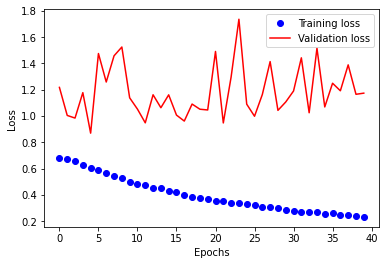

In [ ]:
epochs=range(40)
train_loss= history2.history['loss']
valid_loss=history2.history['val_loss']
plt.plot(epochs, train_loss,'bo', label='Training loss')
plt.plot(epochs, valid_loss,'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Evaluating Model with Batch normalization and Drop out with test set

In [ ]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc=model2.evaluate(x_test,y_test_vec)
print("training loss="+str(loss_and_acc[0]))
print("training accuracy="+str(loss_and_acc[1]))

  5/313 [..............................] - ETA: 9s - loss: 1.0177 - accuracy: 0.7937

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 10s 30ms/step - loss: 1.1959 - accuracy: 0.7316
training loss=1.195947527885437
training accuracy=0.7315999865531921


## Observation: Test accuracy for model created with dropout and batch normalization is 73.15% which is higher compared to the model created in step 4